<a href="https://colab.research.google.com/github/wales101/don/blob/master/deep_learning_with_CVN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


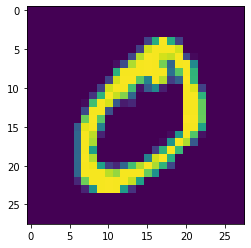

In [5]:
%matplotlib inline

plt.imshow(x_train[1])

In [8]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

In [12]:
x_test = x_test/255
x_train = x_train/255

In [14]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.reshape(60000, 28, 28, 1)

In [16]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [18]:
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

In [21]:
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [23]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
early = EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=20, validation_data=(x_test, y_test_cat), callbacks=[early])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3593 - accuracy: 0.8902 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1211 - accuracy: 0.9694 - val_loss: 0.0554 - val_accuracy: 0.9837
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9783 - val_loss: 0.0371 - val_accuracy: 0.9893
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0746 - accuracy: 0.9819 - val_loss: 0.0457 - val_accuracy: 0.9873
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9840 - val_loss: 0.0323 - val_accuracy: 0.9909
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0543 - accuracy: 0.9864 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9874 - val_loss: 0.0342 - val_accuracy:

In [25]:
metrics = pd.DataFrame(model.history.history)

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.359336,0.890183,0.060445,0.9818
1,0.121053,0.969450,0.055355,0.9837
2,0.085811,0.978317,0.037134,0.9893
3,0.074607,0.981900,0.045654,0.9873
4,0.064115,0.983983,0.032317,0.9909


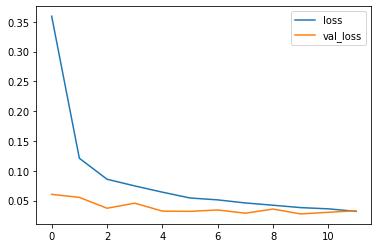

In [30]:
metrics[['loss', 'val_loss']].plot()

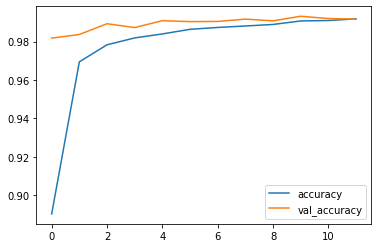

In [31]:
metrics[['accuracy', 'val_accuracy']].plot()

In [33]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9917


[0.03290052339434624, 0.9916999936103821]

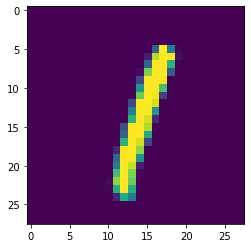

In [45]:
sap = x_test[5]

plt.imshow(sap.reshape(28,28))

In [43]:
pred = model.predict_classes(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      1.00      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


[[ 975    0    0    0    0    0    2    1    2    0]
 [   2 1121    2    1    0    0    3    2    4    0]
 [   0    0 1031    0    0    0    0    0    1    0]
 [   0    0    4 1003    0    2    0    0    1    0]
 [   0    0    0    0  972  

In [46]:
model.predict_classes(sap.reshape(1,28,28,1))

array([1])